In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:\Projects\Titanic Project\Datasets\\train.csv')
test = pd.read_csv('C:\Projects\Titanic Project\Datasets\\test.csv')

In [3]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

# Light Data Exploration

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [7]:
num_var = train[['Age', 'SibSp', 'Parch', 'Fare']]
cat_var = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

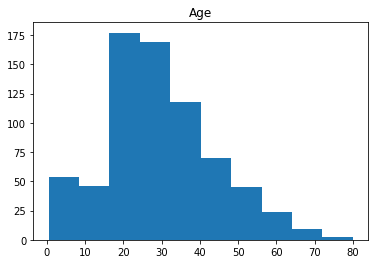

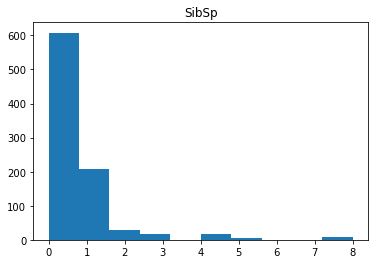

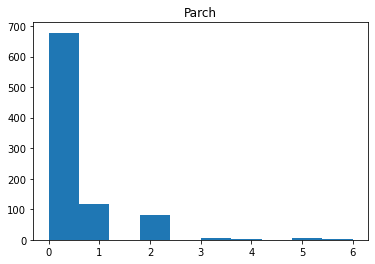

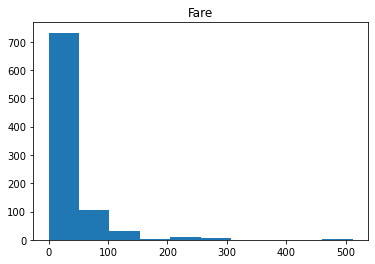

In [8]:
for i in num_var.columns:
    plt.hist(num_var[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

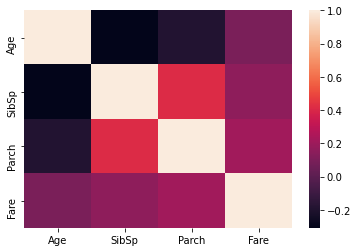

In [9]:
print(num_var.corr())
sns.heatmap(num_var.corr())

In [10]:
pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


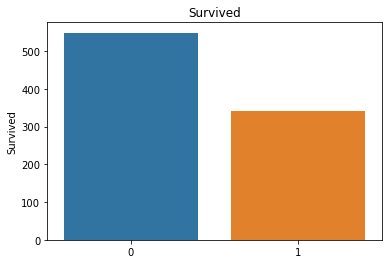

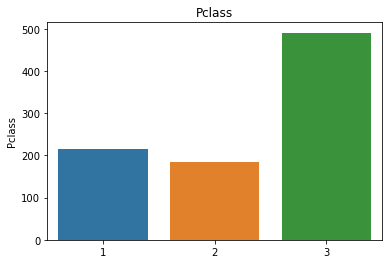

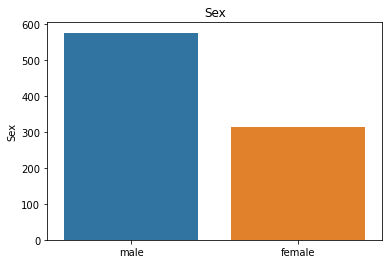

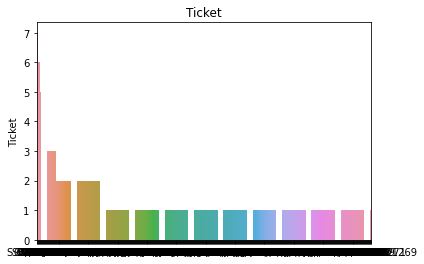

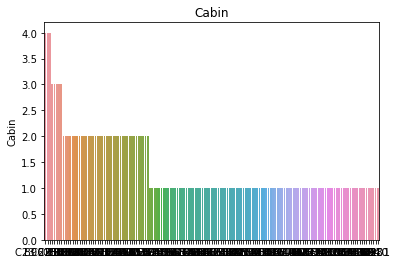

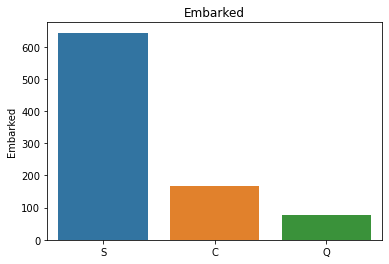

In [11]:
for i in cat_var.columns:
    sns.barplot(x = cat_var[i].value_counts().index, y = cat_var[i].value_counts()).set_title(i)
    plt.show()

In [12]:
# Comparing survival and each of these categorical variables
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [13]:
cat_var.Cabin
train['multiple_cabins'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['multiple_cabins'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: multiple_cabins, dtype: int64

In [14]:
pd.pivot_table(train, index = 'Survived', columns = 'multiple_cabins', values = 'Ticket', aggfunc = 'count')

multiple_cabins,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [15]:
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

In [16]:
print(train.cabin_adv.value_counts())
pd.pivot_table(train, index = 'Survived', columns = 'cabin_adv', values = 'Name', aggfunc = 'count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [17]:
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x : ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [18]:
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [19]:
pd.set_option("max_rows", None)
train['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
sopp           3
wep            3
scah           2
ppp            2
sotono2        2
swpp           2
casoton        1
sp             1
scahbasle      1
fc             1
sca4           1
scow           1
fa             1
as             1
sc             1
sop            1
Name: ticket_letters, dtype: int64

In [20]:
pd.pivot_table(train, index = 'Survived', columns = 'numeric_ticket', values = 'Ticket', aggfunc = 'count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [21]:
pd.pivot_table(train, index = 'Survived', columns = 'ticket_letters', values = 'Ticket', aggfunc = 'count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [22]:
train.Name.head(50)
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [23]:
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Lady              1
Sir               1
Jonkheer          1
Mme               1
Capt              1
Ms                1
the Countess      1
Don               1
Name: name_title, dtype: int64

(889,)

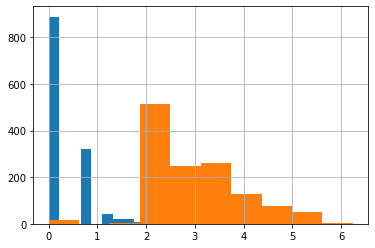

In [24]:
all_data['multiple_cabins'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '')
                                                   .replace('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# impute nulls for continuous data
all_data.Age = all_data.Age.fillna(train.Age.mean())
all_data.Fare = all_data.Fare.fillna(train.Fare.mean())

# drop null 'embarked' rows. Only 2 instances of this training and 0 in test
all_data.dropna(subset=['Embarked'], inplace = True)

# tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp + 1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare + 1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies
all_data.Pclass = all_data.Pclass.astype(str)

# created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked',
                                       'cabin_adv', 'multiple_cabins', 'numeric_ticket', 'name_title', 'train_test']])

# split to train test again
x_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1)
x_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)


y_train = all_data[all_data.train_test == 1].Survived
y_train.shape

In [25]:
# Scale Data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 
                                                                                                    'norm_fare']])
all_dummies_scaled

x_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis = 1)
x_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis = 1)
y_train = all_data[all_data.train_test == 1].Survived

# Model Building (Baseline Validation Performance)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [27]:
# Use Naive Bayes as a general baseline for classification tasks
gnb = GaussianNB()
cv = cross_val_score(gnb, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [28]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [29]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [30]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, x_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.74719101 0.74157303 0.80898876 0.75842697 0.82485876]
0.776207706468609


In [31]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.74719101 0.74157303 0.80898876 0.75280899 0.81920904]
0.7739541674601662


In [32]:
kmn = KNeighborsClassifier()
cv = cross_val_score(kmn, x_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.76966292 0.80898876 0.80337079 0.81460674 0.83615819]
0.8065574811147084


In [33]:
kmn = KNeighborsClassifier()
cv = cross_val_score(kmn, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.80337079 0.85310734]
0.8155652891512728


In [34]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, x_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.78651685 0.85393258 0.73033708 0.84180791]
0.8065638291119152


In [35]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.81460674 0.78651685 0.85393258 0.73033708 0.84180791]
0.8054402336062972


In [36]:
svc = SVC(probability = True)
cv = cross_val_score(svc, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.8324319177299563


In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1, eval_metric='mlogloss', use_label_encoder = False)
cv = cross_val_score(xgb, x_train_scaled, y = y_train, cv = 5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.84831461 0.78651685 0.81920904]
0.8177743921792675


In [38]:
# voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote"yes" or "no" and the result is just a popular vote. for this, you generally want odd numbers
# a "soft" classifier averages the confidence of each of the models. If the average confidence is > 50% that it is a 1, it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr', lr),('kmn', kmn), ('rf', rf), ('gnb', gnb),
                                            ('svc', svc), ('xgb', xgb)], voting = 'soft')

In [39]:
cv = cross_val_score(voting_clf, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.83146067 0.81460674 0.83146067 0.80337079 0.85875706]
0.8279311877102774


In [40]:
voting_clf.fit(x_train_scaled, y_train)
y_hat_base_vc = voting_clf.predict(x_test_scaled)
basic_submission = {'PassengerId' : test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data = basic_submission)
base_submission.to_csv('base_submission.csv', index = False)

In [41]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x_train)
x_train = imp.transform(x_train)
x_test = imp.transform(x_test)

# Model Tuned Performance

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [43]:
# simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [44]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
             'penalty' : ['l1', 'l2'],
             'C' : np.logspace(-4, 4, 20),
             'solver' : ['liblinear']}
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(x_train_scaled, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8268075922046594
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [45]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'p' : [1, 2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(x_train_scaled, y_train)
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8301720307243065
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [46]:
svc = SVC(probability = True)
param_grid = tuned_neighbors = [{'kernel' : ['rbf'], 'gamma' : [.1, .5, 1, 2, 5, 10],
                                'C' : [.1, 1, 10, 100, 1000]},
                               {'kernel': ['linear'], 'C' : [.1, 1, 10, 100, 1000]},
                               {'kernel' : ['poly'], 'degree' : [2, 3, 4, 5], 'C' : [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(x_train_scaled, y_train)
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8324319177299563
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


# Model Additional Ensemble Approaches

In [50]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_


voting_clf_hard = VotingClassifier(estimators = [('knn', best_knn), ('svc', best_svc)], voting = 'hard')
voting_clf_soft = VotingClassifier(estimators = [('knn', best_knn), ('svc', best_svc)], voting = 'soft')
voting_clf_all = VotingClassifier(estimators = [('knn', best_knn), ('svc', best_svc), ('lr', best_lr)], voting = 'soft')

print('voting_clf_hard: ', cross_val_score(voting_clf_hard, x_train, y_train, cv = 5))
print('voting_clf_hard_mean: ', cross_val_score(voting_clf_hard, x_train, y_train, cv = 5).mean())

print('voting_clf_soft: ', cross_val_score(voting_clf_soft, x_train, y_train, cv = 5))
print('voting_clf_soft_mean: ', cross_val_score(voting_clf_soft, x_train, y_train, cv = 5).mean())

print('voting_clf_all: ', cross_val_score(voting_clf_all, x_train, y_train, cv = 5))
print('voting_clf_all: ', cross_val_score(voting_clf_all, x_train, y_train, cv = 5).mean())


voting_clf_hard:  [0.78651685 0.81460674 0.80337079 0.79213483 0.82485876]
voting_clf_hard_mean:  0.8042975941090587
voting_clf_soft:  [0.7752809  0.82022472 0.81460674 0.80337079 0.84180791]
voting_clf_soft_mean:  0.811058211134387
voting_clf_all:  [0.79213483 0.8258427  0.80898876 0.80337079 0.85310734]
voting_clf_all:  0.8166888846568907


In [53]:
# make predictions
voting_clf_hard.fit(x_train_scaled, y_train)
voting_clf_soft.fit(x_train_scaled, y_train)
voting_clf_all.fit(x_train_scaled, y_train)

y_hat_vc_hard = voting_clf_hard.predict(x_test_scaled)
y_hat_vc_soft = voting_clf_soft.predict(x_test_scaled)
y_hat_vc_all = voting_clf_all.predict(x_test_scaled)

In [69]:
# contvert output to dataframe
final_data = {'PassengerId' : test.PassengerId, 'Survived' : y_hat_vc_hard}
submission = pd.DataFrame(data = final_data)

final_data_2 = {'PassengerId' : test.PassengerId, 'Survived' : y_hat_vc_soft}
submission_2 = pd.DataFrame(data = final_data_2)

final_data_3 = {'PassengerID' : test.PassengerId, 'Survived' : y_hat_vc_all}
submission_3 = pd.DataFrame(data = final_data_3)

final_data_comp = {'PassengerID' : test.PassengerId, 'Survived_vc_hard' : y_hat_vc_hard, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all}
submission_3 = pd.DataFrame(data = final_data_3)
comparison = pd.DataFrame(data = final_data_comp)

In [70]:
# track differences betweeen outputs
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis = 1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis = 1)
comparison['difference_soft_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_soft else 0, axis = 1)



In [72]:
comparison.difference_hard_all.value_counts()

0    403
1     15
Name: difference_hard_all, dtype: int64

In [73]:
comparison.difference_soft_hard.value_counts()

0    406
1     12
Name: difference_soft_hard, dtype: int64

In [74]:
comparison.difference_soft_all.value_counts()

0    413
1      5
Name: difference_soft_all, dtype: int64

In [76]:
#prepare submission files
submission.to_csv('submission_vc_hard.csv', index = False)
submission_2.to_csv('submission_vc_soft.csv', index = False)
submission_3.to_csv('submission_vc_all.csv', index = False)